# One-Tailed Test: Loaded Dice

**Hypothesis testing involves the ability to ask questions—such as those about data, predictions based on data, and probability—and quantitatively answer them. More formally, if we formulate two hypotheses, how confidently can we point to one of them being true?** 

Tommy seems to be winning a lot in dice. We are highly suspicious of his treasured dice.

**Let's test the hypothesis to answer this question: Is Tommy rolling too many sixes with a fair die?**

## Importing Libraries and Loading Data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('loaded_500.txt')

In [2]:
data.size

500

## Visualising Data

Plotting histogram

[1. 2. 3. 4. 5. 6.] [70 84 86 74 88 98]


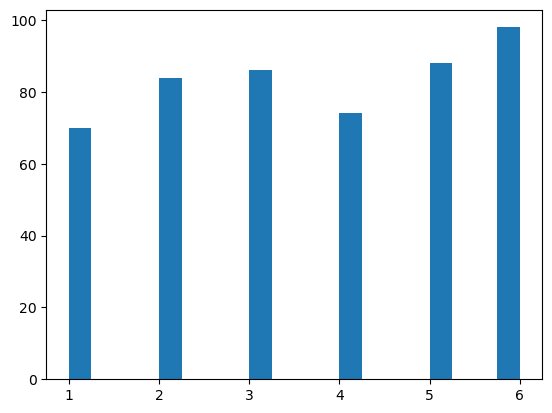

In [3]:
unique, counts = np.unique(data, return_counts=True)
print(unique, counts)
plt.hist(data, bins=20);

## Reducing or Quantifying Data

Here, we don't need each individual roll. We only need the total number of sixes rolled and the total number of rolls.

In [4]:
num_sixes = (data == 6).sum()
num_total = data.size

In [5]:
print(num_sixes,num_total)

98 500


## Posing Hypothesis and Visualising 

We have two outcomes when we roll a die. We roll a six, or we roll something else. With a fair die (our null hypothesis),  𝑝(6)=1/6. As this is discrete distribution with two options, we are looking at the *binomial distribution*.

What are the chances that Tommy rolls 98 *or more sixes* with a fair die?

- Null hypothesis (H0): Tommy's rolls follow the expected probability distribution, and the occurrence of 98 or more sixes is due to random chance with a fair die. 
- Alternative hypothesis (Ha): Tommy's rolls show a statistically significant deviation from the expected probability, indicating that the die may be biased, manipulated or loaded.

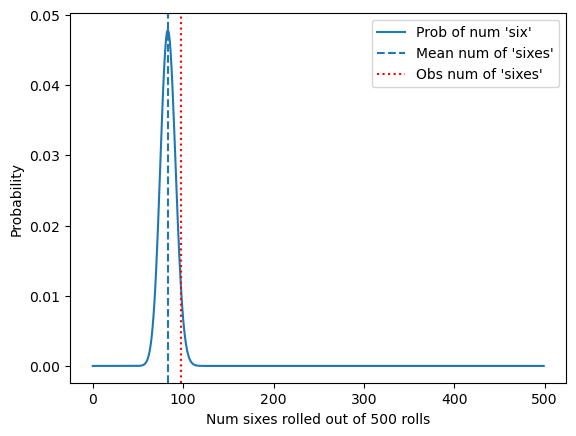

In [6]:
from scipy.stats import binom
n = np.arange(num_total)
prob_n = binom.pmf(n, num_total, 1/6)
# Here, prob_n = probability of rolling 'n' sixes, n = number of successes, num_total = total number of rolls, p = 1/6.
plt.plot(n, prob_n, label= "Prob of num 'six'")
plt.axvline(num_total / 6, ls = '--', label = "Mean num of 'sixes'")
plt.axvline(num_sixes, ls =':', color = 'red', label = "Obs num of 'sixes'")
plt.xlabel(f'Num sixes rolled out of {num_total} rolls')
plt.ylabel('Probability')
plt.legend();

## Calculating P-Vaues

What are the chances that Tommy rolls 98 *or more sixes* with a fair die?

In the above plot, we want the area under the blue curve from 98 in red up to the maximum value of 500. We can do this  using the survival function (SF).

Only 3.7% of the time with a fair dice Tommy would roll 98 sixes or more.


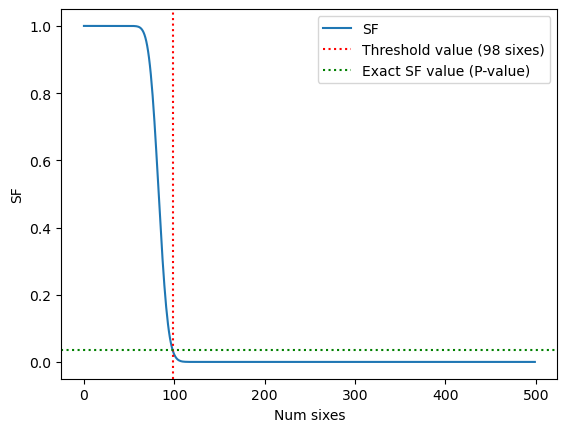

In [7]:
n = np.arange(num_total)
p_sf = binom.sf(n, num_total, 1/6)
plt.plot(n, p_sf, ls='-', label='SF')
plt.axvline(num_sixes, ls = ':', color='red', label='Threshold value (98 sixes)')
sf = binom.sf(num_sixes, num_total, 1/6) # this refers to the exact SF value (i.e. p-value)
plt.axhline(sf, ls = ':', color='green', label='Exact SF value (P-value)')
plt.xlabel('Num sixes')
plt.ylabel('SF')
print(f'Only {sf * 100:.1f}% of the time with a fair dice Tommy would roll 98 sixes or more.')
plt.legend();

If we had set significance level (or α level) at 5% (0.05), our p-value of 0.037 quantified here is < 0.05. Thus, we can now say with 96.3% confidence (i.e. confidence level = 1 - α) that Tommy's dice are loaded. Or, we reject the null hypothesis.